In [1]:
# 1.Understand the problem
# 2.Data gathering
# 3.EDA
# 4.Data processing
# 5.choosing and training model
# 6.Evaluate the model
# 7.Improve a model

# 1.Problem Formulation

In [2]:
# we are going to create a house price prediction model using linear regression.
# We can also used other algorithms to improve the model.

# 2. Data gathering

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.shape

(20640, 10)

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# 3. EDA

In [9]:
# we first divide the data into traning data and test data.so data leakage problem not come.
# and perform analysis on training data.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_data,test_data = train_test_split(df,test_size=0.1)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14263,-117.10,32.69,37.0,1269.0,340.0,1369.0,302.0,2.2102,87200.0,NEAR OCEAN
19363,-123.24,38.70,38.0,1460.0,311.0,569.0,176.0,2.7171,131300.0,NEAR OCEAN
7974,-118.20,33.87,26.0,703.0,202.0,757.0,212.0,2.5250,155500.0,<1H OCEAN
4787,-118.32,34.02,52.0,2511.0,587.0,1660.0,546.0,2.6098,127100.0,<1H OCEAN
11268,-117.97,33.79,33.0,3268.0,641.0,1704.0,591.0,3.6849,211400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167,156300.0,INLAND
4637,-118.29,34.06,27.0,2456.0,1111.0,4137.0,1104.0,1.5954,187500.0,<1H OCEAN
18608,-122.00,37.12,17.0,4413.0,672.0,1674.0,608.0,6.9772,383300.0,<1H OCEAN
11043,-117.83,33.82,26.0,3259.0,456.0,1354.0,459.0,5.7817,267600.0,<1H OCEAN


In [13]:
# make a copy of train data
train_data_copy=train_data

In [14]:
train_data_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14263,-117.10,32.69,37.0,1269.0,340.0,1369.0,302.0,2.2102,87200.0,NEAR OCEAN
19363,-123.24,38.70,38.0,1460.0,311.0,569.0,176.0,2.7171,131300.0,NEAR OCEAN
7974,-118.20,33.87,26.0,703.0,202.0,757.0,212.0,2.5250,155500.0,<1H OCEAN
4787,-118.32,34.02,52.0,2511.0,587.0,1660.0,546.0,2.6098,127100.0,<1H OCEAN
11268,-117.97,33.79,33.0,3268.0,641.0,1704.0,591.0,3.6849,211400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167,156300.0,INLAND
4637,-118.29,34.06,27.0,2456.0,1111.0,4137.0,1104.0,1.5954,187500.0,<1H OCEAN
18608,-122.00,37.12,17.0,4413.0,672.0,1674.0,608.0,6.9772,383300.0,<1H OCEAN
11043,-117.83,33.82,26.0,3259.0,456.0,1354.0,459.0,5.7817,267600.0,<1H OCEAN


In [15]:
print(f"Length train data: {len(train_data)}\nLength of test data: {len(test_data)}")

Length train data: 18576
Length of test data: 2064


In [16]:
train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,18576.0,NaN,NaN,NaN,-119.575274,2.00527,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,18576.0,NaN,NaN,NaN,35.636343,2.136341,32.54,33.93,34.25,37.72,41.95
housing_median_age,18576.0,NaN,NaN,NaN,28.655308,12.591933,1.0,18.0,29.0,37.0,52.0
total_rooms,18576.0,NaN,NaN,NaN,2639.530039,2190.166265,2.0,1451.0,2127.0,3148.25,39320.0
total_bedrooms,18392.0,NaN,NaN,NaN,539.266746,422.738625,1.0,297.0,435.0,648.0,6445.0
population,18576.0,NaN,NaN,NaN,1428.357235,1138.78165,3.0,789.0,1170.0,1726.0,35682.0
households,18576.0,NaN,NaN,NaN,500.530954,382.538532,1.0,281.0,410.0,607.0,6082.0
median_income,18576.0,NaN,NaN,NaN,3.865556,1.895486,0.4999,2.5625,3.5338,4.7344,15.0001
median_house_value,18576.0,NaN,NaN,NaN,206833.002853,115260.406276,14999.0,119675.0,179550.0,265000.0,500001.0
ocean_proximity,18576,5,<1H OCEAN,8240,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        184
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
print(f"total missing values of bedrooms in % : {train_data.isnull().sum()['total_bedrooms']/len(train_data) *100} %")

total missing values of bedrooms in % : 0.9905254091300603 %


In [19]:
# as they are very less we fill them during preprocessing.

# checking values of categorical column
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8240
INLAND        5870
NEAR OCEAN    2378
NEAR BAY      2083
ISLAND           5
Name: count, dtype: int64

In [20]:
# checking correlation between features.
# we have to remove ocean_proximity column because it is a string.
train_data = train_data.drop('ocean_proximity',axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14263,-117.10,32.69,37.0,1269.0,340.0,1369.0,302.0,2.2102,87200.0
19363,-123.24,38.70,38.0,1460.0,311.0,569.0,176.0,2.7171,131300.0
7974,-118.20,33.87,26.0,703.0,202.0,757.0,212.0,2.5250,155500.0
4787,-118.32,34.02,52.0,2511.0,587.0,1660.0,546.0,2.6098,127100.0
11268,-117.97,33.79,33.0,3268.0,641.0,1704.0,591.0,3.6849,211400.0
...,...,...,...,...,...,...,...,...,...
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167,156300.0
4637,-118.29,34.06,27.0,2456.0,1111.0,4137.0,1104.0,1.5954,187500.0
18608,-122.00,37.12,17.0,4413.0,672.0,1674.0,608.0,6.9772,383300.0
11043,-117.83,33.82,26.0,3259.0,456.0,1354.0,459.0,5.7817,267600.0


In [21]:
# checking correlation
correlation = train_data.corr()
correlation['median_house_value']

longitude            -0.045549
latitude             -0.143889
housing_median_age    0.108572
total_rooms           0.133400
total_bedrooms        0.050379
population           -0.025022
households            0.066359
median_income         0.686448
median_house_value    1.000000
Name: median_house_value, dtype: float64

<Axes: >

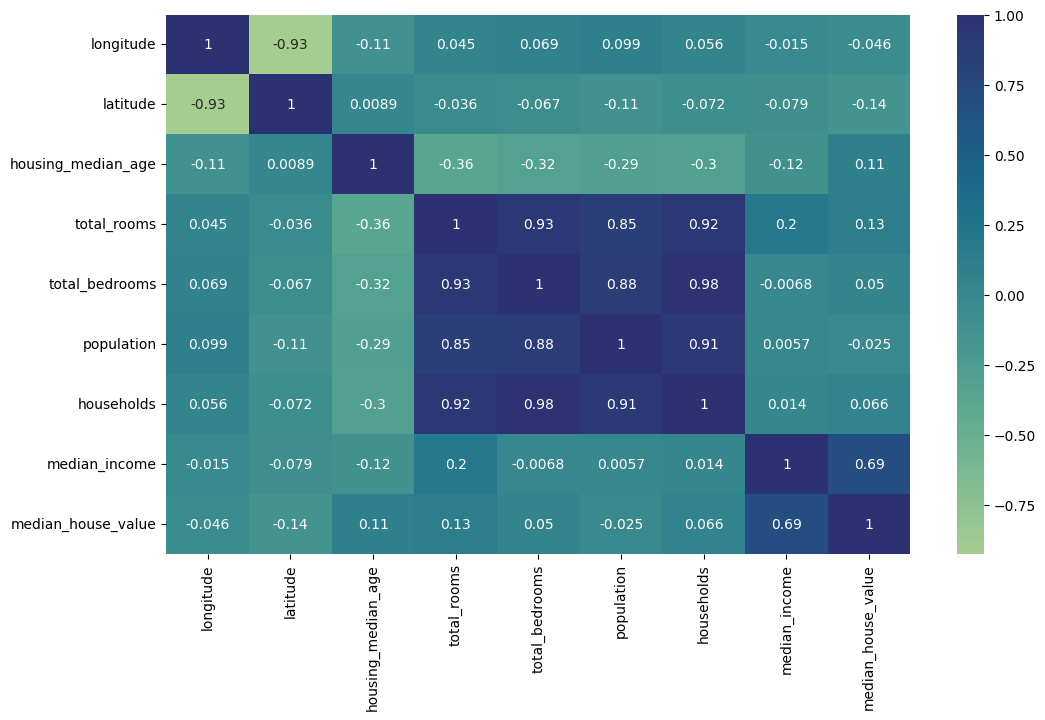

In [22]:
# make heatmap to vizualise
plt.figure(figsize=(12,7))
sns.heatmap(correlation,annot=True,cmap='crest')

In [23]:
# we can vizualise this thing that medium house value is most depend on medium income.

<Axes: xlabel='longitude', ylabel='latitude'>

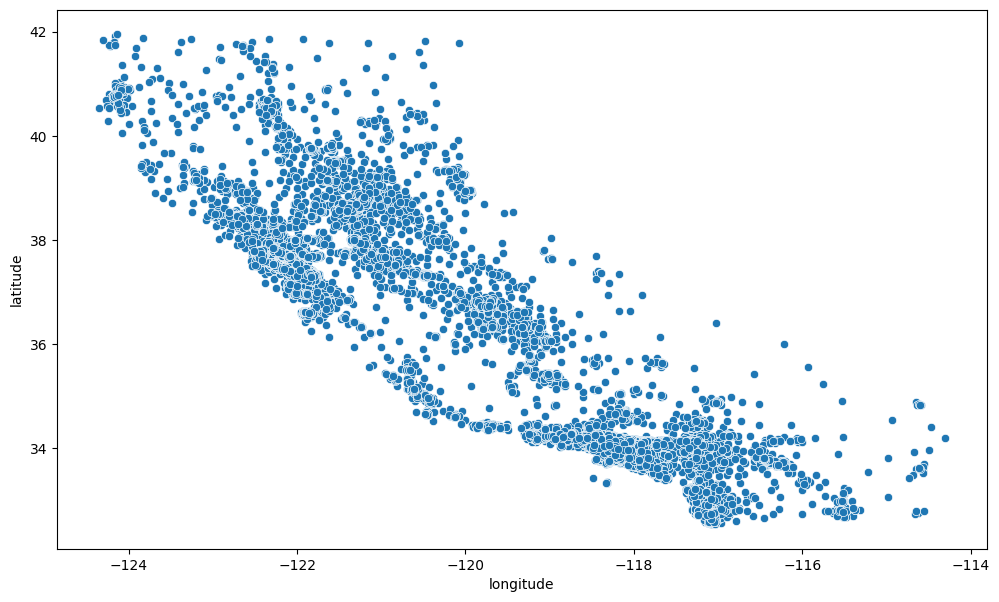

In [24]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=train_data,x='longitude',y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

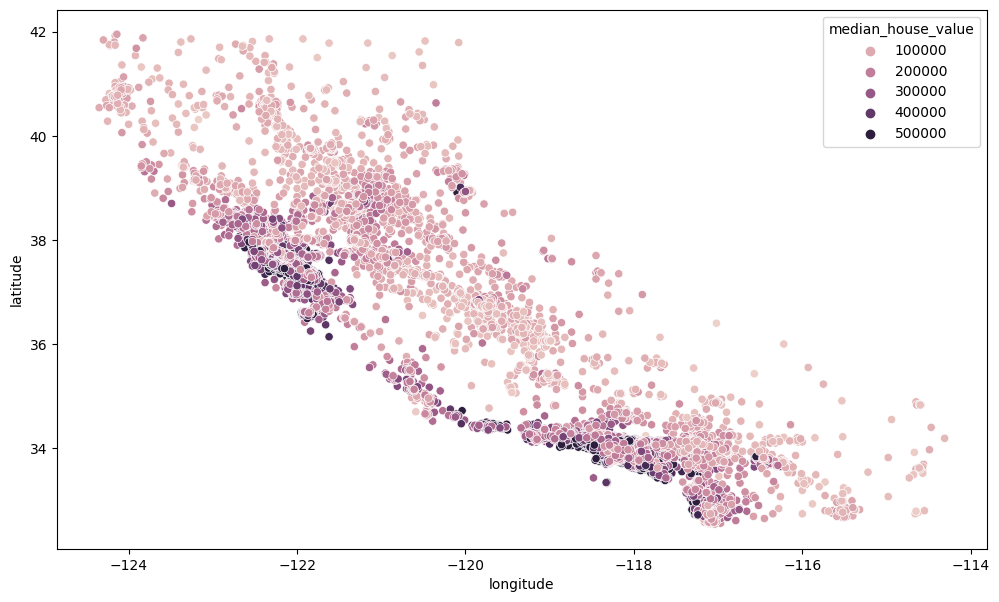

In [25]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=train_data,x='longitude',y='latitude',hue='median_house_value')

In [26]:
train_data['ocean_proximity']=train_data_copy['ocean_proximity']

In [27]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14263,-117.10,32.69,37.0,1269.0,340.0,1369.0,302.0,2.2102,87200.0,NEAR OCEAN
19363,-123.24,38.70,38.0,1460.0,311.0,569.0,176.0,2.7171,131300.0,NEAR OCEAN
7974,-118.20,33.87,26.0,703.0,202.0,757.0,212.0,2.5250,155500.0,<1H OCEAN
4787,-118.32,34.02,52.0,2511.0,587.0,1660.0,546.0,2.6098,127100.0,<1H OCEAN
11268,-117.97,33.79,33.0,3268.0,641.0,1704.0,591.0,3.6849,211400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167,156300.0,INLAND
4637,-118.29,34.06,27.0,2456.0,1111.0,4137.0,1104.0,1.5954,187500.0,<1H OCEAN
18608,-122.00,37.12,17.0,4413.0,672.0,1674.0,608.0,6.9772,383300.0,<1H OCEAN
11043,-117.83,33.82,26.0,3259.0,456.0,1354.0,459.0,5.7817,267600.0,<1H OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

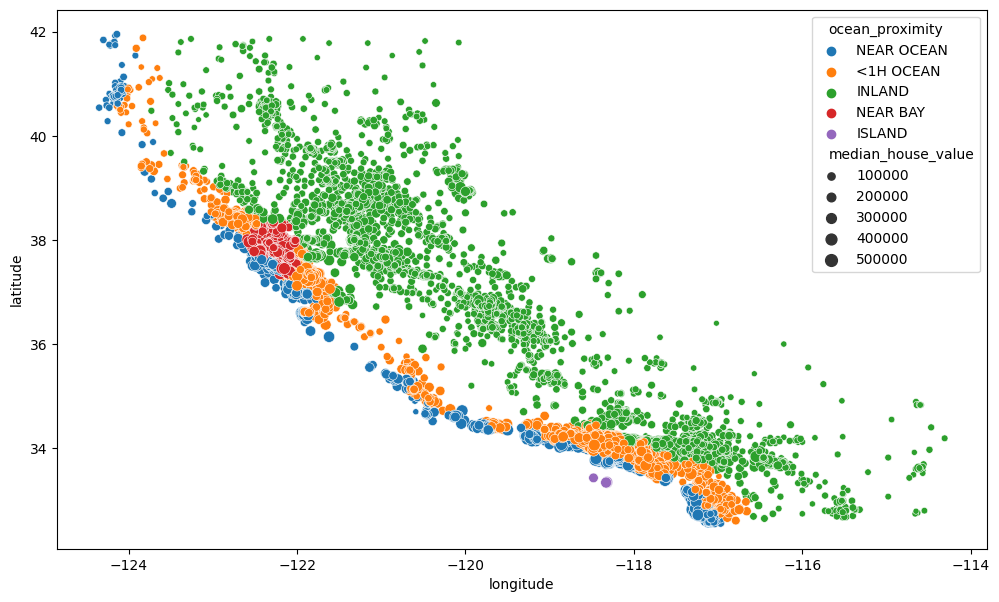

In [28]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=train_data,x='longitude',y='latitude',hue='ocean_proximity',size='median_house_value')

#  Data processing

In [29]:
training_labels = train_data['median_house_value']

In [30]:
training_labels.head()

14263     87200.0
19363    131300.0
7974     155500.0
4787     127100.0
11268    211400.0
Name: median_house_value, dtype: float64

In [31]:
training_input_data = train_data.drop('median_house_value',axis=1)
training_input_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14263,-117.10,32.69,37.0,1269.0,340.0,1369.0,302.0,2.2102,NEAR OCEAN
19363,-123.24,38.70,38.0,1460.0,311.0,569.0,176.0,2.7171,NEAR OCEAN
7974,-118.20,33.87,26.0,703.0,202.0,757.0,212.0,2.5250,<1H OCEAN
4787,-118.32,34.02,52.0,2511.0,587.0,1660.0,546.0,2.6098,<1H OCEAN
11268,-117.97,33.79,33.0,3268.0,641.0,1704.0,591.0,3.6849,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167,INLAND
4637,-118.29,34.06,27.0,2456.0,1111.0,4137.0,1104.0,1.5954,<1H OCEAN
18608,-122.00,37.12,17.0,4413.0,672.0,1674.0,608.0,6.9772,<1H OCEAN
11043,-117.83,33.82,26.0,3259.0,456.0,1354.0,459.0,5.7817,<1H OCEAN


## 1. Handling Missing values

In [32]:
training_input_data = training_input_data.drop('ocean_proximity',axis=1)
training_input_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14263,-117.10,32.69,37.0,1269.0,340.0,1369.0,302.0,2.2102
19363,-123.24,38.70,38.0,1460.0,311.0,569.0,176.0,2.7171
7974,-118.20,33.87,26.0,703.0,202.0,757.0,212.0,2.5250
4787,-118.32,34.02,52.0,2511.0,587.0,1660.0,546.0,2.6098
11268,-117.97,33.79,33.0,3268.0,641.0,1704.0,591.0,3.6849
...,...,...,...,...,...,...,...,...
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167
4637,-118.29,34.06,27.0,2456.0,1111.0,4137.0,1104.0,1.5954
18608,-122.00,37.12,17.0,4413.0,672.0,1674.0,608.0,6.9772
11043,-117.83,33.82,26.0,3259.0,456.0,1354.0,459.0,5.7817


In [33]:
# we are going to filled the missing values.
from sklearn.impute import SimpleImputer
mean_imputer=SimpleImputer(strategy='mean')
training_input_data = pd.DataFrame(mean_imputer.fit_transform(training_input_data),columns=training_input_data.columns,index=training_input_data.index)

In [34]:
training_input_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14263,-117.10,32.69,37.0,1269.0,340.0,1369.0,302.0,2.2102
19363,-123.24,38.70,38.0,1460.0,311.0,569.0,176.0,2.7171
7974,-118.20,33.87,26.0,703.0,202.0,757.0,212.0,2.5250
4787,-118.32,34.02,52.0,2511.0,587.0,1660.0,546.0,2.6098
11268,-117.97,33.79,33.0,3268.0,641.0,1704.0,591.0,3.6849
...,...,...,...,...,...,...,...,...
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167
4637,-118.29,34.06,27.0,2456.0,1111.0,4137.0,1104.0,1.5954
18608,-122.00,37.12,17.0,4413.0,672.0,1674.0,608.0,6.9772
11043,-117.83,33.82,26.0,3259.0,456.0,1354.0,459.0,5.7817


In [35]:
training_input_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

## 2.Encoding Categorical features

In [36]:
training_input_data['ocean_proximity']=train_data['ocean_proximity']
training_input_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14263,-117.10,32.69,37.0,1269.0,340.0,1369.0,302.0,2.2102,NEAR OCEAN
19363,-123.24,38.70,38.0,1460.0,311.0,569.0,176.0,2.7171,NEAR OCEAN
7974,-118.20,33.87,26.0,703.0,202.0,757.0,212.0,2.5250,<1H OCEAN
4787,-118.32,34.02,52.0,2511.0,587.0,1660.0,546.0,2.6098,<1H OCEAN
11268,-117.97,33.79,33.0,3268.0,641.0,1704.0,591.0,3.6849,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167,INLAND
4637,-118.29,34.06,27.0,2456.0,1111.0,4137.0,1104.0,1.5954,<1H OCEAN
18608,-122.00,37.12,17.0,4413.0,672.0,1674.0,608.0,6.9772,<1H OCEAN
11043,-117.83,33.82,26.0,3259.0,456.0,1354.0,459.0,5.7817,<1H OCEAN


In [37]:
training_input_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8240
INLAND        5870
NEAR OCEAN    2378
NEAR BAY      2083
ISLAND           5
Name: count, dtype: int64

## 1. Python Mapping

In [38]:
ocean_mapping={
    '<1H OCEAN':'0',
    'INLAND':'1',
    'NEAR OCEAN':'2',
    'NEAR BAY':'3',
    'ISLAND':'4'
}
ocean_map_encoded = training_input_data['ocean_proximity'].map(ocean_mapping)

In [39]:
ocean_map_encoded

14263    2
19363    2
7974     0
4787     0
11268    0
        ..
12683    1
4637     0
18608    0
11043    0
5282     0
Name: ocean_proximity, Length: 18576, dtype: object

## 2. Ordinary Encoding

In [40]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()

In [41]:
ocean_proximity_arr= np.array(training_input_data['ocean_proximity'])

In [42]:
ocean_proximity_arr = ocean_proximity_arr.reshape(-1,1)

In [43]:
ocean_encoder= encoder.fit_transform(ocean_proximity_arr.reshape(-1,1))
ocean_encoder

array([[4.],
       [4.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

## 3.One Hot Encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder
encoder_1 = OneHotEncoder()

In [45]:
# it returns a sparse matrix,convert it to array.
ocean_1_hot_encoder = encoder_1.fit_transform(ocean_proximity_arr.reshape(-1,1))
ocean_1_hot_encoder = ocean_1_hot_encoder.toarray()

In [46]:
ocean_1_hot_encoder

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

#  3. Scaling Numerical Features

## 1. Normalization

In [47]:
training_input_data=training_input_data.drop('ocean_proximity',axis=1)
training_input_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14263,-117.10,32.69,37.0,1269.0,340.0,1369.0,302.0,2.2102
19363,-123.24,38.70,38.0,1460.0,311.0,569.0,176.0,2.7171
7974,-118.20,33.87,26.0,703.0,202.0,757.0,212.0,2.5250
4787,-118.32,34.02,52.0,2511.0,587.0,1660.0,546.0,2.6098
11268,-117.97,33.79,33.0,3268.0,641.0,1704.0,591.0,3.6849
...,...,...,...,...,...,...,...,...
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167
4637,-118.29,34.06,27.0,2456.0,1111.0,4137.0,1104.0,1.5954
18608,-122.00,37.12,17.0,4413.0,672.0,1674.0,608.0,6.9772
11043,-117.83,33.82,26.0,3259.0,456.0,1354.0,459.0,5.7817


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [49]:
num_scaled = scaler.fit_transform(training_input_data)
num_scaled

array([[0.72211155, 0.01594049, 0.70588235, ..., 0.03828583, 0.04949844,
        0.1179501 ],
       [0.11055777, 0.65462274, 0.7254902 , ..., 0.01586367, 0.02877816,
        0.15290824],
       [0.6125498 , 0.141339  , 0.49019608, ..., 0.02113288, 0.03469824,
        0.13966014],
       ...,
       [0.23406375, 0.48671626, 0.31372549, ..., 0.04683427, 0.09981911,
        0.44670418],
       [0.64940239, 0.1360255 , 0.49019608, ..., 0.03786541, 0.07531656,
        0.36425704],
       [0.58565737, 0.16153029, 0.49019608, ..., 0.08223325, 0.2715014 ,
        0.29662349]])

## 2.Standardization

In [50]:
from sklearn.preprocessing import StandardScaler
scaler_1=StandardScaler()

In [51]:
num_scaled_1 = scaler_1.fit_transform(training_input_data)
num_scaled_1

array([[ 1.23441738, -1.37919079,  0.6627193 , ..., -0.05212486,
        -0.51899686, -0.87333825],
       [-1.82759623,  1.43410617,  0.74213736, ..., -0.75464894,
        -0.84838431, -0.60590629],
       [ 0.68584817, -0.82682966, -0.21087942, ..., -0.58955578,
        -0.75427361, -0.70725504],
       ...,
       [-1.20920912,  0.69450397, -0.925642  , ...,  0.21571245,
         0.28094409,  1.64165116],
       [ 0.8703669 , -0.85023479, -0.21087942, ..., -0.06529719,
        -0.10856964,  1.01092537],
       [ 0.55119936, -0.73789015, -0.21087942, ...,  1.32482234,
         3.01015438,  0.49352447]])

#  Pipeline :

## Creating numerical pipeline

In [52]:
from sklearn.pipeline import Pipeline

In [53]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

num_pipeline_output = num_pipeline.fit_transform(training_input_data)
num_pipeline_output

array([[ 1.23441738, -1.37919079,  0.6627193 , ..., -0.05212486,
        -0.51899686, -0.87333825],
       [-1.82759623,  1.43410617,  0.74213736, ..., -0.75464894,
        -0.84838431, -0.60590629],
       [ 0.68584817, -0.82682966, -0.21087942, ..., -0.58955578,
        -0.75427361, -0.70725504],
       ...,
       [-1.20920912,  0.69450397, -0.925642  , ...,  0.21571245,
         0.28094409,  1.64165116],
       [ 0.8703669 , -0.85023479, -0.21087942, ..., -0.06529719,
        -0.10856964,  1.01092537],
       [ 0.55119936, -0.73789015, -0.21087942, ...,  1.32482234,
         3.01015438,  0.49352447]])

In [54]:
num_pipeline.steps[0]

('imputer', SimpleImputer())

In [55]:
num_pipeline.steps[1]

('scaler', StandardScaler())

## Creating categorical pipeline 

In [56]:
cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])

cat_pipeline_output = cat_pipeline.fit_transform(ocean_proximity_arr)
cat_pipeline_output = cat_pipeline_output.toarray()
cat_pipeline_output

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

## Final Data Processing Pipeline

In [57]:
#adding both arrays
training_data_processed = np.concatenate((num_pipeline_output,cat_pipeline_output),axis=1)

In [58]:
training_data_processed

array([[ 1.23441738, -1.37919079,  0.6627193 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.82759623,  1.43410617,  0.74213736, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.68584817, -0.82682966, -0.21087942, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.20920912,  0.69450397, -0.925642  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8703669 , -0.85023479, -0.21087942, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55119936, -0.73789015, -0.21087942, ...,  0.        ,
         0.        ,  0.        ]])

# 5.Chossing and Training model

In [59]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

In [60]:
reg_model.fit(training_data_processed,training_labels)

LinearRegression()

In [61]:
# let's see coefficents also called weight.
reg_model.coef_

array([-53989.28732776, -54811.36316347,  13518.87664782, -12848.56200672,
        34635.71265728, -43608.33026188,  26528.88988276,  74064.7469242 ,
       -23534.35854908, -61930.7345105 , 131588.60559976, -27078.48279263,
       -19045.02974755])

In [62]:
# let's see intercept also called bias
reg_model.intercept_

242281.5463172786

# 6.Model Evaluation

In [63]:
from sklearn.metrics import mean_squared_error
predictions = reg_model.predict(training_data_processed)

In [64]:
mse = mean_squared_error(training_labels,predictions)

rmse = np.sqrt(mse)
rmse

68751.23561745188

In [65]:
test_labels = test_data['median_house_value']
test_labels

3345      48100.0
3767     341800.0
9675     242700.0
3846     225000.0
148      199600.0
           ...   
15840    347700.0
18127    360600.0
9308     371900.0
8697     286500.0
4554      87500.0
Name: median_house_value, Length: 2064, dtype: float64

In [66]:
test_input_data = test_data.drop('median_house_value',axis=1)
test_input_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3345,-121.11,41.07,26.0,1707.0,308.0,761.0,250.0,2.7188,INLAND
3767,-118.43,34.17,35.0,2922.0,507.0,1130.0,485.0,5.4510,<1H OCEAN
9675,-118.96,37.64,11.0,3934.0,697.0,901.0,345.0,4.2381,INLAND
3846,-118.47,34.19,41.0,1104.0,196.0,495.0,196.0,5.0929,<1H OCEAN
148,-122.22,37.80,52.0,2286.0,464.0,1073.0,441.0,3.0298,NEAR BAY
...,...,...,...,...,...,...,...,...,...
15840,-122.43,37.75,52.0,2960.0,623.0,1191.0,589.0,3.9500,NEAR BAY
18127,-122.02,37.34,30.0,1036.0,151.0,467.0,156.0,6.4480,<1H OCEAN
9308,-122.54,37.98,52.0,1758.0,316.0,607.0,264.0,5.5083,NEAR BAY
8697,-118.34,33.87,28.0,2948.0,566.0,1445.0,524.0,5.3743,<1H OCEAN


In [67]:
test_ocean_proximity = test_input_data['ocean_proximity']
test_ocean_proximity

3345        INLAND
3767     <1H OCEAN
9675        INLAND
3846     <1H OCEAN
148       NEAR BAY
           ...    
15840     NEAR BAY
18127    <1H OCEAN
9308      NEAR BAY
8697     <1H OCEAN
4554     <1H OCEAN
Name: ocean_proximity, Length: 2064, dtype: object

In [68]:
test_input_data = test_data.drop('ocean_proximity',axis=1)

In [69]:
test_input_data = num_pipeline.fit_transform(test_input_data)
test_input_data

array([[-0.80036766,  2.56960495, -0.19933463, ..., -0.63265736,
        -0.61817929, -1.36324254],
       [ 0.54832218, -0.66675071,  0.51910545, ..., -0.01477198,
         0.79177485,  1.15551346],
       [ 0.28160366,  0.96080786, -1.39673477, ..., -0.38287391,
         0.16585677,  0.30563699],
       ...,
       [-1.5200044 ,  1.12028045,  1.87615893, ..., -0.59584716,
         0.82134456,  1.4136495 ],
       [ 0.593614  , -0.80746183, -0.03968128, ...,  0.08777071,
         0.75219375,  0.68126352],
       [ 0.64393825, -0.71834479, -1.6362148 , ...,  0.06936561,
        -1.49345314, -1.02535018]])

In [70]:
test_input_data.shape

(2064, 9)

In [71]:
test_cat_input = cat_pipeline.fit_transform(np.reshape(test_ocean_proximity,newshape=(-1,1)))
test_cat_input= test_cat_input.toarray()
test_cat_input

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [72]:
test_input_data = np.concatenate((test_input_data,test_cat_input),axis=1)
test_input_data

array([[-0.80036766,  2.56960495, -0.19933463, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54832218, -0.66675071,  0.51910545, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28160366,  0.96080786, -1.39673477, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.5200044 ,  1.12028045,  1.87615893, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.593614  , -0.80746183, -0.03968128, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64393825, -0.71834479, -1.6362148 , ...,  0.        ,
         0.        ,  0.        ]])

In [73]:
test_input_data.shape

(2064, 13)

In [76]:
predictions = reg_model.predict(test_input_data)
predictions

array([255948.29096726, 232801.68381623, 308797.54930165, ...,
       292499.30678209, 233537.84426868, 102238.77644927])

In [77]:
test_mse = mean_squared_error(test_labels,predictions)

test_rmse = np.sqrt(test_mse)
test_rmse

151411.08215396322

In [78]:
# it is giving error of 151k on test data.Which is very bad.

## 7.Improving Model